In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
pd.options.display.max_columns = 60

In [4]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv.xls")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Feature Engineering

In [8]:
# Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
def set_cpk(row):
    if row["creatinine_phosphokinase"] < 10:
        return "Low"
    elif row["creatinine_phosphokinase"] >=10 and row["creatinine_phosphokinase"] <= 120:
        return "Normal"
    else:
        return "High"
    
df = df.assign(cpk_desc = df.apply(set_cpk, axis = 1))

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cpk_desc
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,High
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,High
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,High
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Normal
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,High


In [10]:
df = pd.get_dummies(df, drop_first = True)

In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cpk_desc_Normal
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X = df.drop(["DEATH_EVENT"], 1)
X = pd.DataFrame(scaler.fit_transform(X), columns=df.drop(["DEATH_EVENT"], 1).columns)

y = df["DEATH_EVENT"]


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  cpk_desc_Normal           299 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


In [14]:
# Handling the imbalanced data by Oversampling using SMOTENC
# SMOTE-NC is capable of handling a mix of categorical and continous features 
# as just SMOTE doesnt support categorical data and thus produce continous outputs

from imblearn.over_sampling import SMOTENC
smote = SMOTENC(categorical_features = [1,3,5,9,10,12], random_state=42)
X, y = smote.fit_sample(X,y)


print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({1: 203, 0: 203})


In [15]:
print(X.shape)
df.shape

(406, 13)


(299, 14)

In [16]:
y.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [17]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cpk_desc_Normal
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,0.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,0.0


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

Stratify property in train test split This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. It's good practice to stratify your sample by the target variable. This will ensure your training set looks similar to your test set, making your evaluation metrics more reliable.

In [19]:
# importing logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [20]:
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81        61
           1       0.83      0.74      0.78        61

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.79       122
weighted avg       0.80      0.80      0.79       122

[[52  9]
 [16 45]]


In [21]:
#importing extra tree classifier and then initializing it

from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(n_jobs=4, random_state = 1)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)


print(classification_report(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        61
           1       0.91      0.87      0.89        61

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122

[[56  5]
 [ 8 53]]


In [22]:
# importing lightgbm Classifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

print(classification_report(y_test, lgbm_pred))
print(confusion_matrix(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        61
           1       0.89      0.97      0.93        61

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122

[[54  7]
 [ 2 59]]


In [23]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [24]:
# Tuning the parameters of Lightgbm

params = {} 
params['learning_rate'] = [np.random.uniform(0, 1)]
params['boosting_type'] = [np.random.choice(['gbdt', 'dart', 'goss'])]
params['objective'] = ['regression']
params['metric'] = ['mae']
params['sub_feature'] = [np.random.uniform(0, 1)]
params['num_leaves'] = [np.random.randint(20, 300)]
params['min_data'] = [np.random.randint(10, 100)]
params['max_depth'] = [np.random.randint(5, 200)]
params['iterations'] = [np.random.randint(10, 10000)]

search = GridSearchCV(estimator = lgbm, param_grid = params)


search.fit(X_train,y_train)
search.best_params_, search.best_score_

({'boosting_type': 'dart',
  'iterations': 6332,
  'learning_rate': 0.18007685371240167,
  'max_depth': 31,
  'metric': 'mae',
  'min_data': 53,
  'num_leaves': 259,
  'objective': 'regression',
  'sub_feature': 0.6530784869273613},
 0.8487468671679199)

In [26]:
#  applying the tuned parameters to lightgbm to check if the model will perform better

lgbm1 = LGBMClassifier(boosting_type = 'dart',
  iterations = 6332,
  learning_rate =  6332,
  max_depth = 31,
  metric = 'mae',
  min_data = 53,
  num_leaves = 259,
  objective = 'regression',
  sub_feature =0.6530784869273613, random_state=1)

lgbm1.fit(X_train, y_train)
lgbm1_pred = lgbm1.predict(X_test)


print(classification_report(y_test, lgbm1_pred))
print(confusion_matrix(y_test, lgbm1_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        61
           1       0.57      0.59      0.58        61

    accuracy                           0.57       122
   macro avg       0.57      0.57      0.57       122
weighted avg       0.57      0.57      0.57       122

[[34 27]
 [25 36]]


#### LGBMClassifier did not perform well with hyperparameter tuning

In [27]:
# importing xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        61
           1       0.94      0.95      0.94        61

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122

[[57  4]
 [ 3 58]]


In [28]:
# Tuning the parameters of XGBOOST
# USing GridSearch

param_test3 = {
    'learning_rate':[0.1,0.001, 0.01, 1,2],
 'gamma':[i/10.0 for i in range(0,5)],
    'max_depth':[4,5,6],
 'min_child_weight':[4,5,6, 8, 10,12],
    'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]

}
gsearch = GridSearchCV(estimator = XGBClassifier(n_estimators=140, objective= 'binary:logistic', nthread=4, 
                                                 scale_pos_weight=1,seed=27), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_



({'colsample_bytree': 0.6,
  'gamma': 0.0,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 4,
  'reg_alpha': 0.01,
  'subsample': 0.8},
 0.93304890921886)

In [31]:
xgb1 = XGBClassifier(learning_rate =0.01, n_estimators=1000, max_depth=4, min_child_weight=4, gamma=0.0,
                     subsample=0.8, colsample_bytree=0.6, objective= 'binary:logistic', 
                     nthread=4, scale_pos_weight=1, seed=27, reg_alpha = 0.01,)


xgb1.fit(X_train, y_train)
xgb1_pred = xgb1.predict(X_test)


print(classification_report(y_test, xgb1_pred))
print(confusion_matrix(y_test, xgb1_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        61
           1       0.92      0.90      0.91        61

    accuracy                           0.91       122
   macro avg       0.91      0.91      0.91       122
weighted avg       0.91      0.91      0.91       122

[[56  5]
 [ 6 55]]


#### Hyperparameter tuning did not improve the model

In [32]:
#importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        61
           1       0.89      0.92      0.90        61

    accuracy                           0.90       122
   macro avg       0.90      0.90      0.90       122
weighted avg       0.90      0.90      0.90       122

[[54  7]
 [ 5 56]]


In [33]:
# Tuning the parameters of RandomForest
# Using RandomizedSearch


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [34]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [36]:
# Using the new value for alpha
rf_hype=RandomForestClassifier( n_estimators = 1000,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
 )

rf_hype.fit(X_train, y_train)
rf1_pred=rf_hype.predict(X_test)

print(classification_report(y_test, rf1_pred))
print(confusion_matrix(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        61
           1       0.89      0.93      0.91        61

    accuracy                           0.91       122
   macro avg       0.91      0.91      0.91       122
weighted avg       0.91      0.91      0.91       122

[[54  7]
 [ 4 57]]


We had a better result by tuning the parameters

In [37]:
#  importing CatBoostClassifier

from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=1)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

Learning rate set to 0.006019
0:	learn: 0.6886458	total: 125ms	remaining: 2m 4s
1:	learn: 0.6831602	total: 139ms	remaining: 1m 9s
2:	learn: 0.6783219	total: 149ms	remaining: 49.4s
3:	learn: 0.6738073	total: 157ms	remaining: 39.2s
4:	learn: 0.6685441	total: 164ms	remaining: 32.5s
5:	learn: 0.6635888	total: 169ms	remaining: 27.9s
6:	learn: 0.6585321	total: 174ms	remaining: 24.6s
7:	learn: 0.6544401	total: 179ms	remaining: 22.1s
8:	learn: 0.6481724	total: 185ms	remaining: 20.4s
9:	learn: 0.6435300	total: 190ms	remaining: 18.8s
10:	learn: 0.6398018	total: 195ms	remaining: 17.5s
11:	learn: 0.6357735	total: 199ms	remaining: 16.4s
12:	learn: 0.6311686	total: 204ms	remaining: 15.5s
13:	learn: 0.6266502	total: 208ms	remaining: 14.6s
14:	learn: 0.6222761	total: 212ms	remaining: 13.9s
15:	learn: 0.6178339	total: 217ms	remaining: 13.3s
16:	learn: 0.6132167	total: 224ms	remaining: 13s
17:	learn: 0.6094533	total: 228ms	remaining: 12.4s
18:	learn: 0.6055157	total: 232ms	remaining: 12s
19:	learn: 0.60

175:	learn: 0.2953317	total: 865ms	remaining: 4.05s
176:	learn: 0.2943024	total: 870ms	remaining: 4.04s
177:	learn: 0.2932601	total: 874ms	remaining: 4.04s
178:	learn: 0.2924611	total: 879ms	remaining: 4.03s
179:	learn: 0.2914734	total: 883ms	remaining: 4.02s
180:	learn: 0.2909191	total: 888ms	remaining: 4.01s
181:	learn: 0.2901369	total: 892ms	remaining: 4.01s
182:	learn: 0.2893099	total: 896ms	remaining: 4s
183:	learn: 0.2880686	total: 899ms	remaining: 3.99s
184:	learn: 0.2870726	total: 904ms	remaining: 3.98s
185:	learn: 0.2861604	total: 908ms	remaining: 3.97s
186:	learn: 0.2854915	total: 911ms	remaining: 3.96s
187:	learn: 0.2847081	total: 915ms	remaining: 3.95s
188:	learn: 0.2839920	total: 918ms	remaining: 3.94s
189:	learn: 0.2830629	total: 922ms	remaining: 3.93s
190:	learn: 0.2820439	total: 925ms	remaining: 3.92s
191:	learn: 0.2812446	total: 929ms	remaining: 3.91s
192:	learn: 0.2805046	total: 932ms	remaining: 3.9s
193:	learn: 0.2797690	total: 935ms	remaining: 3.89s
194:	learn: 0.27

352:	learn: 0.1932988	total: 1.53s	remaining: 2.81s
353:	learn: 0.1930232	total: 1.53s	remaining: 2.8s
354:	learn: 0.1925237	total: 1.54s	remaining: 2.8s
355:	learn: 0.1920504	total: 1.54s	remaining: 2.79s
356:	learn: 0.1917473	total: 1.55s	remaining: 2.79s
357:	learn: 0.1914287	total: 1.55s	remaining: 2.78s
358:	learn: 0.1910798	total: 1.55s	remaining: 2.78s
359:	learn: 0.1908592	total: 1.56s	remaining: 2.77s
360:	learn: 0.1904996	total: 1.56s	remaining: 2.77s
361:	learn: 0.1903121	total: 1.57s	remaining: 2.76s
362:	learn: 0.1899202	total: 1.57s	remaining: 2.75s
363:	learn: 0.1894737	total: 1.57s	remaining: 2.75s
364:	learn: 0.1893214	total: 1.58s	remaining: 2.74s
365:	learn: 0.1889262	total: 1.58s	remaining: 2.74s
366:	learn: 0.1884429	total: 1.58s	remaining: 2.73s
367:	learn: 0.1878816	total: 1.59s	remaining: 2.73s
368:	learn: 0.1873781	total: 1.59s	remaining: 2.72s
369:	learn: 0.1869834	total: 1.59s	remaining: 2.71s
370:	learn: 0.1865398	total: 1.6s	remaining: 2.71s
371:	learn: 0.1

539:	learn: 0.1378833	total: 2.25s	remaining: 1.91s
540:	learn: 0.1376432	total: 2.25s	remaining: 1.91s
541:	learn: 0.1374489	total: 2.25s	remaining: 1.91s
542:	learn: 0.1372065	total: 2.26s	remaining: 1.9s
543:	learn: 0.1370462	total: 2.26s	remaining: 1.9s
544:	learn: 0.1368843	total: 2.27s	remaining: 1.89s
545:	learn: 0.1366095	total: 2.27s	remaining: 1.89s
546:	learn: 0.1364159	total: 2.27s	remaining: 1.88s
547:	learn: 0.1362409	total: 2.28s	remaining: 1.88s
548:	learn: 0.1359586	total: 2.28s	remaining: 1.88s
549:	learn: 0.1356946	total: 2.29s	remaining: 1.87s
550:	learn: 0.1354923	total: 2.29s	remaining: 1.87s
551:	learn: 0.1353212	total: 2.29s	remaining: 1.86s
552:	learn: 0.1350973	total: 2.3s	remaining: 1.86s
553:	learn: 0.1348953	total: 2.3s	remaining: 1.85s
554:	learn: 0.1346805	total: 2.3s	remaining: 1.85s
555:	learn: 0.1344348	total: 2.31s	remaining: 1.84s
556:	learn: 0.1340608	total: 2.31s	remaining: 1.84s
557:	learn: 0.1337678	total: 2.31s	remaining: 1.83s
558:	learn: 0.133

724:	learn: 0.1026518	total: 2.92s	remaining: 1.11s
725:	learn: 0.1025848	total: 2.93s	remaining: 1.1s
726:	learn: 0.1024947	total: 2.93s	remaining: 1.1s
727:	learn: 0.1022947	total: 2.94s	remaining: 1.1s
728:	learn: 0.1020206	total: 2.94s	remaining: 1.09s
729:	learn: 0.1017823	total: 2.94s	remaining: 1.09s
730:	learn: 0.1015682	total: 2.95s	remaining: 1.08s
731:	learn: 0.1014867	total: 2.95s	remaining: 1.08s
732:	learn: 0.1013526	total: 2.96s	remaining: 1.08s
733:	learn: 0.1011907	total: 2.96s	remaining: 1.07s
734:	learn: 0.1010451	total: 2.96s	remaining: 1.07s
735:	learn: 0.1009154	total: 2.97s	remaining: 1.06s
736:	learn: 0.1007650	total: 2.97s	remaining: 1.06s
737:	learn: 0.1005853	total: 2.98s	remaining: 1.06s
738:	learn: 0.1004353	total: 2.98s	remaining: 1.05s
739:	learn: 0.1002635	total: 2.98s	remaining: 1.05s
740:	learn: 0.1001558	total: 2.98s	remaining: 1.04s
741:	learn: 0.1000351	total: 2.99s	remaining: 1.04s
742:	learn: 0.0998817	total: 2.99s	remaining: 1.03s
743:	learn: 0.0

902:	learn: 0.0791415	total: 3.6s	remaining: 387ms
903:	learn: 0.0790324	total: 3.6s	remaining: 383ms
904:	learn: 0.0789178	total: 3.61s	remaining: 379ms
905:	learn: 0.0788443	total: 3.61s	remaining: 375ms
906:	learn: 0.0787407	total: 3.62s	remaining: 371ms
907:	learn: 0.0785849	total: 3.62s	remaining: 367ms
908:	learn: 0.0785318	total: 3.63s	remaining: 363ms
909:	learn: 0.0783999	total: 3.63s	remaining: 359ms
910:	learn: 0.0782107	total: 3.63s	remaining: 355ms
911:	learn: 0.0781231	total: 3.64s	remaining: 351ms
912:	learn: 0.0779924	total: 3.64s	remaining: 347ms
913:	learn: 0.0779124	total: 3.64s	remaining: 343ms
914:	learn: 0.0777830	total: 3.65s	remaining: 339ms
915:	learn: 0.0776991	total: 3.65s	remaining: 335ms
916:	learn: 0.0775665	total: 3.65s	remaining: 331ms
917:	learn: 0.0774370	total: 3.66s	remaining: 327ms
918:	learn: 0.0773572	total: 3.66s	remaining: 323ms
919:	learn: 0.0772548	total: 3.67s	remaining: 319ms
920:	learn: 0.0771049	total: 3.67s	remaining: 315ms
921:	learn: 0.

In [38]:
print(classification_report(y_test, cat_pred))
print(confusion_matrix(y_test, cat_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        61
           1       0.92      0.92      0.92        61

    accuracy                           0.92       122
   macro avg       0.92      0.92      0.92       122
weighted avg       0.92      0.92      0.92       122

[[56  5]
 [ 5 56]]


In [39]:
# Tuning the Parameters of CatBoost

from catboost import CatBoostClassifier
cat1_hype = CatBoostClassifier(depth = 10, iterations = 1000, learning_rate = 0.01, random_state=1,
                               verbose = 100)
cat1_hype.fit(X_train, y_train)
cat1_pred = cat1_hype.predict(X_test)



0:	learn: 0.6859051	total: 32.9ms	remaining: 32.9s
100:	learn: 0.2687559	total: 3.51s	remaining: 31.2s
200:	learn: 0.1468798	total: 6.7s	remaining: 26.6s
300:	learn: 0.0943314	total: 9.7s	remaining: 22.5s
400:	learn: 0.0666412	total: 12.7s	remaining: 19s
500:	learn: 0.0501660	total: 15.7s	remaining: 15.7s
600:	learn: 0.0391294	total: 18.8s	remaining: 12.5s
700:	learn: 0.0315792	total: 21.8s	remaining: 9.3s
800:	learn: 0.0258304	total: 24.8s	remaining: 6.17s
900:	learn: 0.0216583	total: 27.9s	remaining: 3.06s
999:	learn: 0.0185944	total: 30.9s	remaining: 0us


In [40]:

print(classification_report(y_test, cat1_pred))
print(confusion_matrix(y_test, cat1_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        61
           1       0.88      0.92      0.90        61

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122

[[53  8]
 [ 5 56]]


In [41]:
models = ['Logistic Regression' ,'ExtraTree Regression', 'LightgbmClassifier', 'Hyped_Light Classifier',
       'XGB Classifier', 'Hyped_XGB Classifier', 'Random Forest Classifier', 'Hyped_Random Forest Classifier', 
        'CatBoost Classifier', 'Hyped_CatBoost Classifier']
predictions = [lr_pred, tree_pred, lgbm_pred, lgbm1_pred, xgb_pred, xgb1_pred, rf_pred, rf1_pred, 
            cat_pred,  cat1_pred]


In [42]:
# To get the recall score for each model

from sklearn.metrics import recall_score, accuracy_score

for (i,j) in zip(predictions, models):
        model_recall = recall_score(y_test, i)
        print("The recall score for {} is {}".format(j, model_recall))
    

The recall score for Logistic Regression is 0.7377049180327869
The recall score for ExtraTree Regression is 0.8688524590163934
The recall score for LightgbmClassifier is 0.9672131147540983
The recall score for Hyped_Light Classifier is 0.5901639344262295
The recall score for XGB Classifier is 0.9508196721311475
The recall score for Hyped_XGB Classifier is 0.9016393442622951
The recall score for Random Forest Classifier is 0.9180327868852459
The recall score for Hyped_Random Forest Classifier is 0.9344262295081968
The recall score for CatBoost Classifier is 0.9180327868852459
The recall score for Hyped_CatBoost Classifier is 0.9180327868852459


#### from this, we can see that LightgbmClassifier gave us the highest recall score of 0.97, followed by XGB Classifier with recall score of 0.95.

In [43]:

lr_acc = accuracy_score(y_test, lr_pred)
tree_acc = accuracy_score(y_test, tree_pred)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
lgbm1_acc = accuracy_score(y_test, lgbm1_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb1_acc = accuracy_score(y_test, xgb1_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf1_acc = accuracy_score(y_test, rf1_pred)
cat_acc = accuracy_score(y_test, cat_pred)
cat1_acc = accuracy_score(y_test, cat1_pred)

lr_recall = recall_score(y_test, lr_pred)
tree_recall = recall_score(y_test, tree_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm1_recall = recall_score(y_test, lgbm1_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb1_recall = recall_score(y_test, xgb1_pred)
rf_recall = recall_score(y_test, rf_pred)
rf1_recall = recall_score(y_test, rf1_pred)
cat_recall = recall_score(y_test, cat_pred)
cat1_recall = recall_score(y_test, cat1_pred)


In [44]:
recalls = [lr_recall, tree_recall, lgbm_recall, lgbm1_recall, xgb_recall, xgb1_recall, rf_recall, rf1_recall, 
            cat_recall,  cat1_recall]

rec = []
for i in recalls:
    r = round(i, 2)
    rec.append(r)

In [45]:
rec

[0.74, 0.87, 0.97, 0.59, 0.95, 0.9, 0.92, 0.93, 0.92, 0.92]

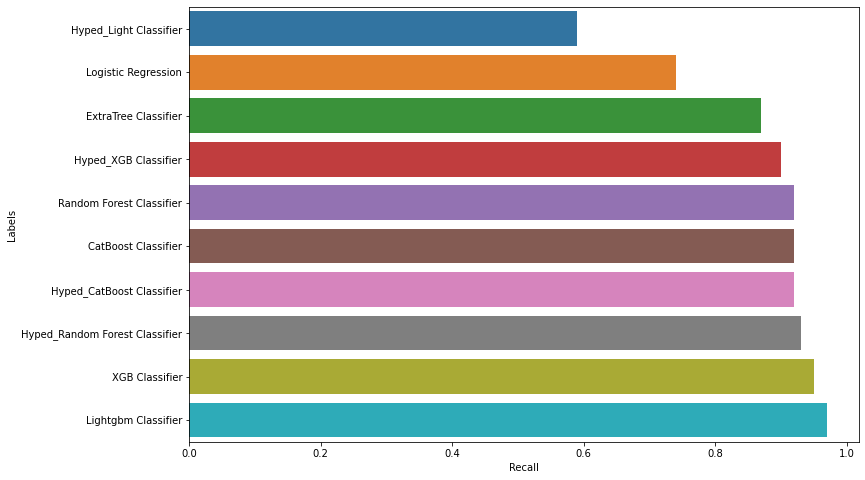

In [46]:
#ploting a barchart to show the recall_score scores of each model  
y_axis=['Logistic Regression' ,'ExtraTree Classifier', 'Lightgbm Classifier', 'Hyped_Light Classifier',
       'XGB Classifier', 'Hyped_XGB Classifier', 'Random Forest Classifier', 'Hyped_Random Forest Classifier', 
        'CatBoost Classifier', 'Hyped_CatBoost Classifier']

df1 = pd.DataFrame({"Labels" : y_axis, "Recall" : rec})
df1  = df1.sort_values(by = "Recall")

plt.figure(figsize = (12,8))
sns.barplot(x = "Recall", y = "Labels",data = df1, linewidth=1.5)

In [47]:
# to get the accuracy score of each model

from sklearn.metrics import accuracy_score

for (i,j) in zip(predictions, models):
        model_recall = accuracy_score(y_test, i)
        print("The accuracy score for {} is {}".format(j, model_recall))


The accuracy score for Logistic Regression is 0.7950819672131147
The accuracy score for ExtraTree Regression is 0.8934426229508197
The accuracy score for LightgbmClassifier is 0.9262295081967213
The accuracy score for Hyped_Light Classifier is 0.5737704918032787
The accuracy score for XGB Classifier is 0.9426229508196722
The accuracy score for Hyped_XGB Classifier is 0.9098360655737705
The accuracy score for Random Forest Classifier is 0.9016393442622951
The accuracy score for Hyped_Random Forest Classifier is 0.9098360655737705
The accuracy score for CatBoost Classifier is 0.9180327868852459
The accuracy score for Hyped_CatBoost Classifier is 0.8934426229508197


#### XGB Classifier gave us the highest accuracy of 0.943

In [48]:
accuracy = [lr_acc, tree_acc, lgbm_acc,lgbm1_acc, xgb_acc, xgb1_acc, rf_acc, rf1_acc, cat_acc,  cat1_acc]

In [49]:
acc = []
for i in accuracy:
    r = round(i, 3)
    acc.append(r)

In [50]:
acc

[0.795, 0.893, 0.926, 0.574, 0.943, 0.91, 0.902, 0.91, 0.918, 0.893]

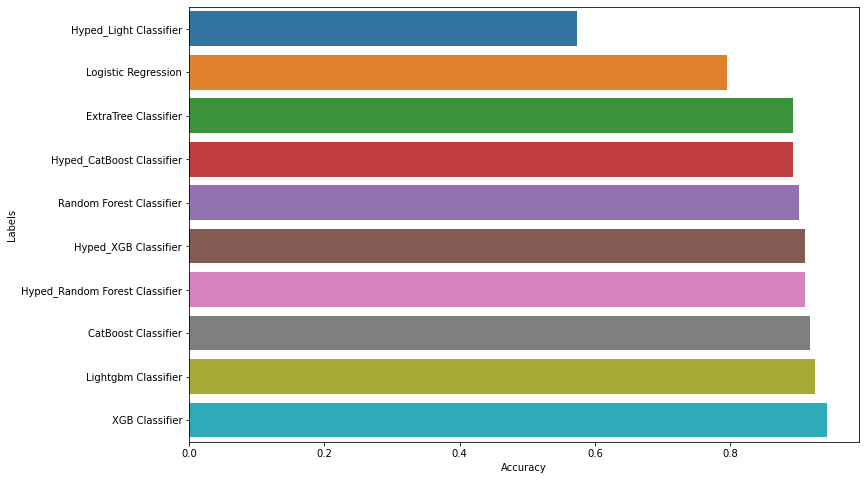

In [51]:
#ploting a barchart to show the rmse scores of each model  

y_axis=['Logistic Regression' ,'ExtraTree Classifier', 'Lightgbm Classifier', 'Hyped_Light Classifier',
       'XGB Classifier', 'Hyped_XGB Classifier', 'Random Forest Classifier', 'Hyped_Random Forest Classifier', 
        'CatBoost Classifier', 'Hyped_CatBoost Classifier']

df2 = pd.DataFrame({"Labels" : y_axis, "Accuracy" : acc})
df2  = df2.sort_values(by = "Accuracy")

plt.figure(figsize = (12,8))
sns.barplot(x = "Accuracy", y = "Labels",data = df2, linewidth=1.5)

